<a href="https://colab.research.google.com/github/Harshit3144/frame-track-video-continuity-and-change-detection/blob/main/frame_track_video_continuity_and_change_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install opencv-python matplotlib numpy

In [10]:
from google.colab import files
uploaded = files.upload()

Saving openCV 4k video.mp4 to openCV 4k video.mp4


In [11]:
import cv2
import os

# Make directory to store frames
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

# Load the uploaded video
video_path = list(uploaded.keys())[0]
cap = cv2.VideoCapture(video_path)

frame_count = 0
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
print(f"Video FPS: {fps}")

# Extract frames
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_path = f"{output_dir}/frame_{frame_count}.jpg"
    cv2.imwrite(frame_path, frame)
    frame_count += 1

cap.release()
print(f"✅ Total {frame_count} frames extracted and saved in 'frames/' folder.")

Video FPS: 29
✅ Total 289 frames extracted and saved in 'frames/' folder.


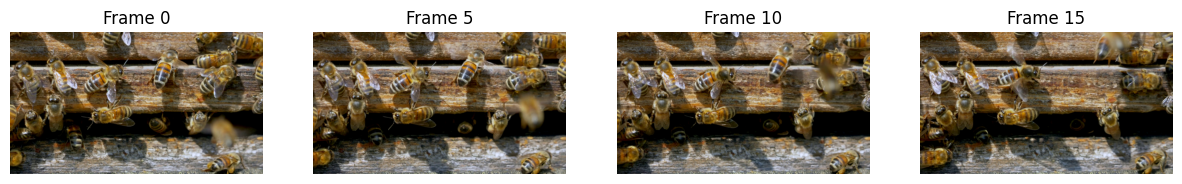

In [12]:
import matplotlib.pyplot as plt
import cv2

def show_frames(frame_indices):
    plt.figure(figsize=(15,5))
    for i, idx in enumerate(frame_indices):
        img = cv2.imread(f"frames/frame_{idx}.jpg")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(frame_indices), i+1)
        plt.imshow(img)
        plt.title(f"Frame {idx}")
        plt.axis('off')
    plt.show()

# Show frame 0, 5, 10, 15 (as example)
show_frames([0, 5, 10, 15])

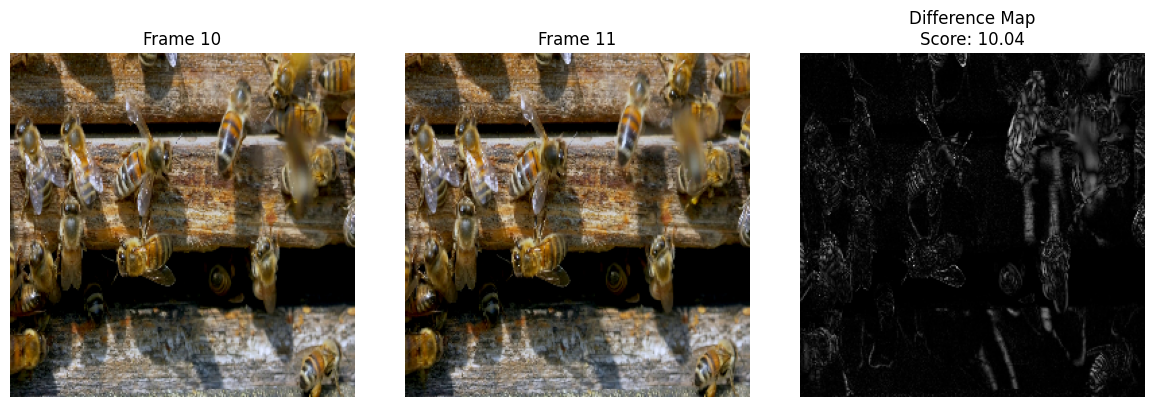

In [13]:
import numpy as np

def compare_frames(idx1, idx2):
    frame1 = cv2.imread(f"frames/frame_{idx1}.jpg")
    frame2 = cv2.imread(f"frames/frame_{idx2}.jpg")

    # Resize for consistency
    frame1 = cv2.resize(frame1, (256, 256))
    frame2 = cv2.resize(frame2, (256, 256))

    # Calculate absolute difference
    diff = cv2.absdiff(frame1, frame2)
    gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    score = np.sum(gray_diff) / (256 * 256)

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {idx1}")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {idx2}")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(gray_diff, cmap='gray')
    plt.title(f"Difference Map\nScore: {score:.2f}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Compare frame 10 and 11
compare_frames(10, 11)

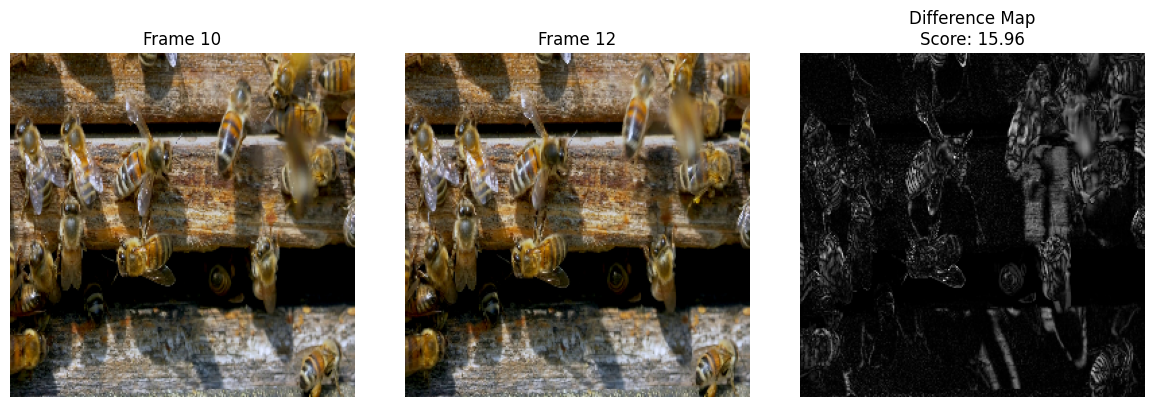

In [14]:
# Let’s simulate missing frame 11: compare frame 10 and 12 directly
compare_frames(10, 12)

🧠 SSIM score between frame 10 and 12: 0.6811


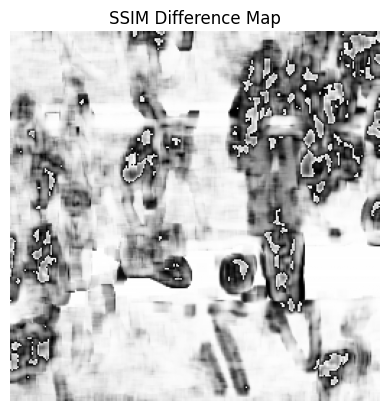

In [15]:
!pip install scikit-image
from skimage.metrics import structural_similarity as ssim

def ssim_score(idx1, idx2):
    frame1 = cv2.imread(f"frames/frame_{idx1}.jpg")
    frame2 = cv2.imread(f"frames/frame_{idx2}.jpg")

    frame1 = cv2.resize(frame1, (256, 256))
    frame2 = cv2.resize(frame2, (256, 256))

    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    score, diff = ssim(gray1, gray2, full=True)
    diff = (diff * 255).astype("uint8")

    print(f"🧠 SSIM score between frame {idx1} and {idx2}: {score:.4f}")
    plt.imshow(diff, cmap='gray')
    plt.title("SSIM Difference Map")
    plt.axis('off')
    plt.show()

# Example with missing frame
ssim_score(10, 12)

🎨 Histogram similarity score between frame 10 and 11: 0.9989 (1 = identical)


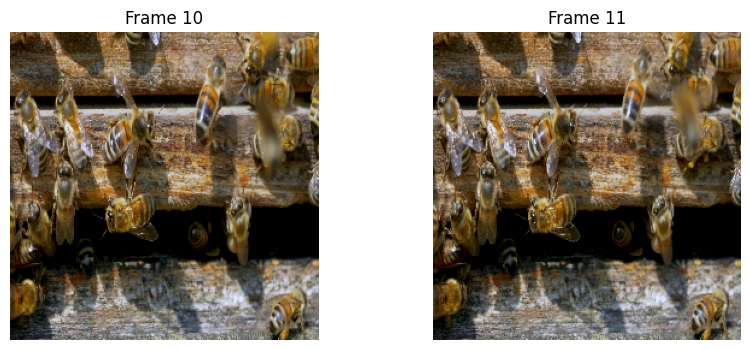

🎨 Histogram similarity score between frame 10 and 12: 0.9989 (1 = identical)


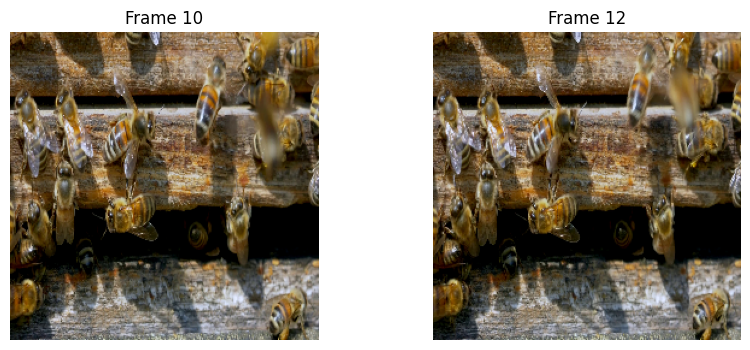

In [16]:
def histogram_difference(idx1, idx2):
    frame1 = cv2.imread(f"frames/frame_{idx1}.jpg")
    frame2 = cv2.imread(f"frames/frame_{idx2}.jpg")

    # Resize for consistency
    frame1 = cv2.resize(frame1, (256, 256))
    frame2 = cv2.resize(frame2, (256, 256))

    # Convert to HSV color space for better color comparison
    hsv1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
    hsv2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2HSV)

    # Calculate histogram for each channel and compare
    score_total = 0
    for i in range(3):  # H, S, V channels
        hist1 = cv2.calcHist([hsv1], [i], None, [256], [0, 256])
        hist2 = cv2.calcHist([hsv2], [i], None, [256], [0, 256])

        # Normalize histograms
        cv2.normalize(hist1, hist1)
        cv2.normalize(hist2, hist2)

        # Compare histograms (Correlation method: 1 = perfect match)
        score = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
        score_total += score

    avg_score = score_total / 3

    # Display results
    print(f"🎨 Histogram similarity score between frame {idx1} and {idx2}: {avg_score:.4f} (1 = identical)")

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {idx1}")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {idx2}")
    plt.axis('off')
    plt.show()

# Example usage: Compare consecutive frames
histogram_difference(10, 11)

# Example usage: Compare with a missing frame
histogram_difference(10, 12)